In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster')
rcParams['lines.linewidth']=1

In [3]:
from kid_readout.interactive import *

INFO: 2016-06-19 22:40:26,767 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [4]:
import glob

In [5]:
fns = ['/artemis/readout/2016-06-17_231132_scan_lo_850.0_MHz.nc',
    '/artemis/readout/2016-06-17_230924_scan_lo_1010.0_MHz.nc',
       '/artemis/readout/2016-06-18_005836_scan_lo_1210.0_MHz.nc',
       '/artemis/readout/2016-06-17_231323_scan_lo_1350.0_MHz.nc',
       '/artemis/readout/2016-06-18_005938_scan_lo_1400.0_MHz.nc'
      ]

In [5]:
fns = glob.glob('/artemis/readout/2016-06-19_22*_scan_lo_*_MHz.nc')
print fns

['/artemis/readout/2016-06-19_223038_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-19_223140_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-19_223243_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-19_223346_scan_lo_1400.0_MHz.nc']


In [10]:
fns = ['/artemis/readout/2016-06-19_223038_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-19_223140_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-19_223243_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-19_223346_scan_lo_1400.0_MHz.nc']


In [6]:
sas = []
ncs = []
for fn in fns:
    nc = NCFile(fn)
    ncs.append(nc)
    sas.append(nc.SweepArray0)

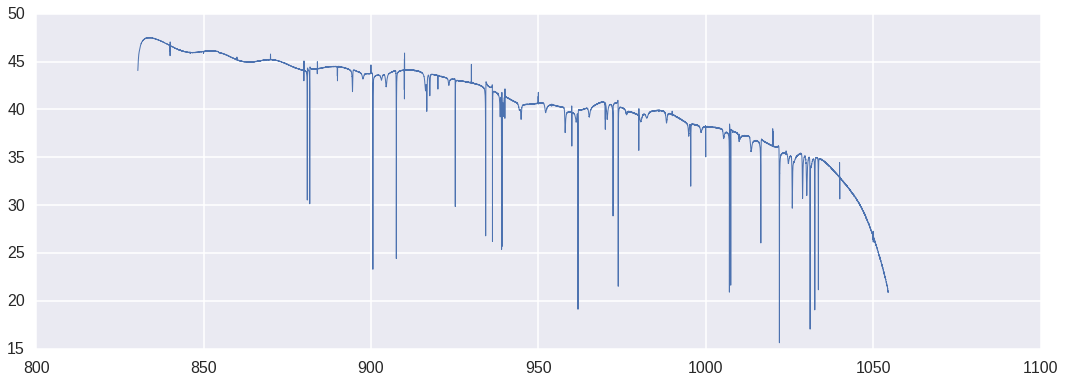

In [75]:
figure(figsize=(18,6))
for sa in sas:
    plot(sa.frequency_MHz,20*np.log10(np.abs(sa.s21_point)))

In [76]:
sa.s21_raw.shape

(16384, 8192)

In [77]:
fold = sa.s21_raw.reshape(16384,-1,256).mean(1)

In [78]:
fold.shape

(16384, 256)

In [7]:
def get_fractional_frequency_response(folded):
    period = folded.shape[-1]
    template = np.ones((period,),dtype='float')
    template[:period//2] = -1
    response = np.abs(np.fft.ifft(np.fft.fft(template)*np.fft.fft(folded,axis=-1),axis=-1)*2./period).max(-1)
    return response

In [80]:
response = get_fractional_frequency_response(fold)

In [93]:
np.convolve(response,np.ones(5)/5.).argsort()[-5:]

array([5646, 5647, 5648, 7958, 7959])

<IPython.core.display.Javascript object>


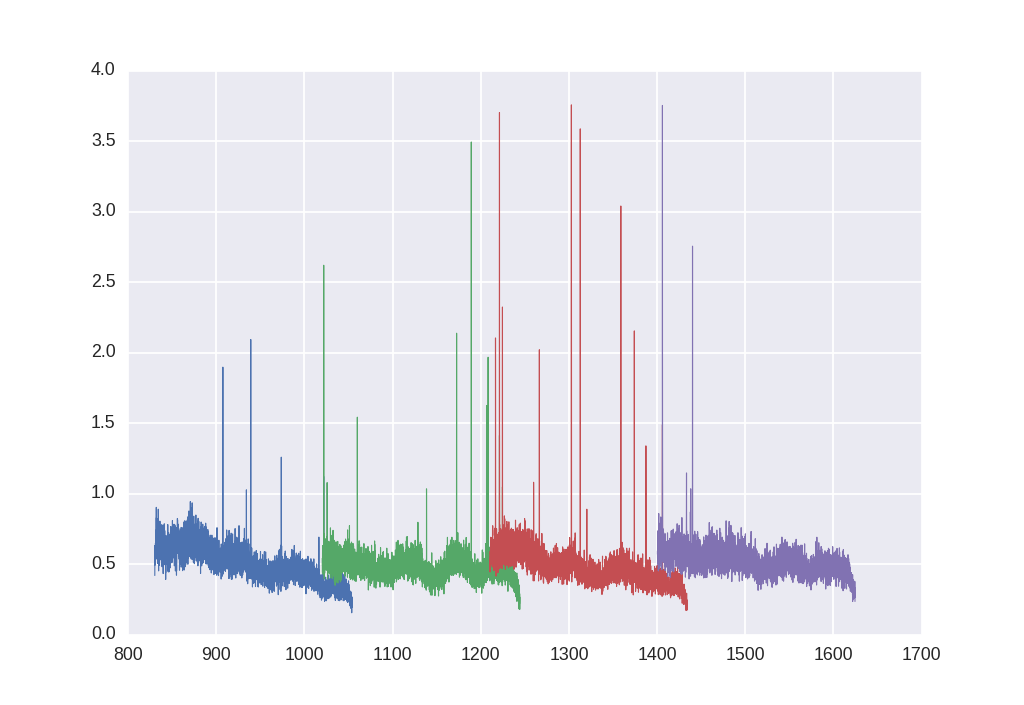

In [9]:
figure()#(figsize=(18,6))
for sa in sas:
    fold = sa.s21_raw.reshape(16384,-1,256).mean(1)
    response = get_fractional_frequency_response(fold)
    plot(sa.frequency_MHz.reshape((-1,4)).mean(1),response.reshape((-1,4)).mean(1))
#axvline(1016)

In [39]:
fns = glob.glob('/artemis/readout/2016-06-19_22*_scan_lo_*_MHz.nc')
print fns

['/artemis/readout/2016-06-19_223038_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-19_223140_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-19_223243_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-19_223346_scan_lo_1400.0_MHz.nc', '/artemis/readout/2016-06-19_224847_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-19_225151_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-19_225459_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-19_225814_scan_lo_1400.0_MHz.nc']


In [40]:
fns = ['/artemis/readout/2016-06-19_224847_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-19_225151_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-19_225459_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-19_225814_scan_lo_1400.0_MHz.nc']

In [41]:
sas = []
ncs = []
for fn in fns:
    nc = NCFile(fn)
    ncs.append(nc)
    sas.append(nc.SweepArray0)

In [14]:
sa = sas[0]

In [15]:
sa.s21_raw.shape

(16384, 32768)

In [17]:
fold = sa.s21_raw.reshape(sa.s21_raw.shape[0],-1,256).mean(1)

In [18]:
response = get_fractional_frequency_response(fold)

In [46]:
np.where?

In [47]:
maxs = np.zeros(sa.frequency.shape)
for sa in sas:
    maxs = np.where(np.abs(sa.s21_point) > maxs, np.abs(sa.s21_point), maxs)

In [50]:
import scipy.signal

In [51]:
scipy.signal.resample?

In [56]:
bandpass = scipy.signal.resample(scipy.signal.resample(maxs,100),16384)

<IPython.core.display.Javascript object>


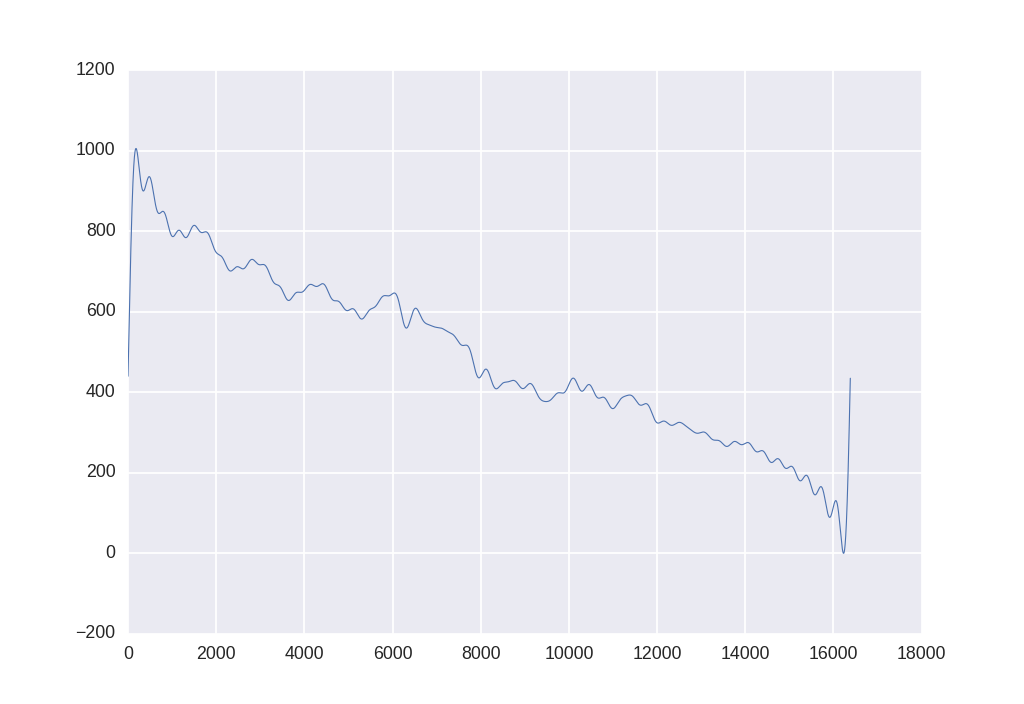

In [55]:
plot(scipy.signal.resample(scipy.signal.resample(maxs,100),16384))

In [45]:
maxs.shape

(16384,)

<IPython.core.display.Javascript object>


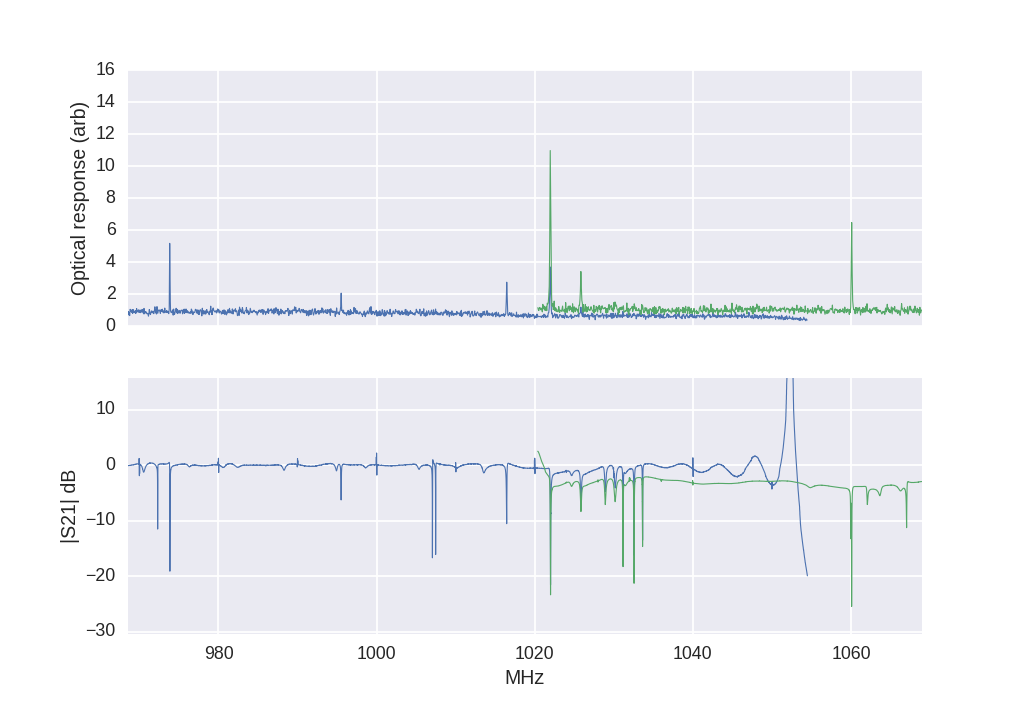

In [61]:
#figure()#(figsize=(18,6))
fig,(ax1,ax2) = subplots(2,1,sharex=True)
for sa in sas:
    fold = sa.s21_raw.reshape(sa.s21_raw.shape[0],-1,256).mean(1)
    response = get_fractional_frequency_response(fold)
    ax1.plot(sa.frequency_MHz.reshape((-1,4)).mean(1),response.reshape((-1,4)).mean(1))
    ax2.plot(sa.frequency_MHz,20*np.log10(np.abs(sa.s21_point/bandpass)))
    
ax2.set_ylim(-30,5)
ax2.set_xlim(870,1465)
ax2.set_xlabel('MHz')
ax1.set_ylabel('Optical response (arb)')
ax2.set_ylabel('|S21| dB')
#axvline(1016)

In [22]:
sa.s21_raw.shape

(16384, 32768)

In [43]:
3000/200.

15.0